IMAGE CLASSIFICATION 

In [ ]:
!pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install --upgrade numpy tensorflow keras scikit-learn


In [ ]:
!pip install tensorflow keras scikit-learn numpy

In [5]:
import tensorflow as tf

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#data_train_path ="D:\Image classification ML\Fruits_Vegetables\Fruits_Vegetables\train"
#data_test_path ="D:\Image classification ML\Fruits_Vegetables\Fruits_Vegetables\test"
#data_val_path ="D:\Image classification ML\Fruits_Vegetables\Fruits_Vegetables\validation"

In [12]:
data_train_path = r"D:\Image classification ML\Fruits_Vegetables\Fruits_Vegetables\train"
data_test_path = r"D:\Image classification ML\Fruits_Vegetables\Fruits_Vegetables\test"
data_val_path = r"D:\Image classification ML\Fruits_Vegetables\Fruits_Vegetables\validation"

In [10]:
img_width = 180
img_height =180 

In [13]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [14]:
data_cat = data_train.class_names

In [ ]:
data_cat

In [16]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [17]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


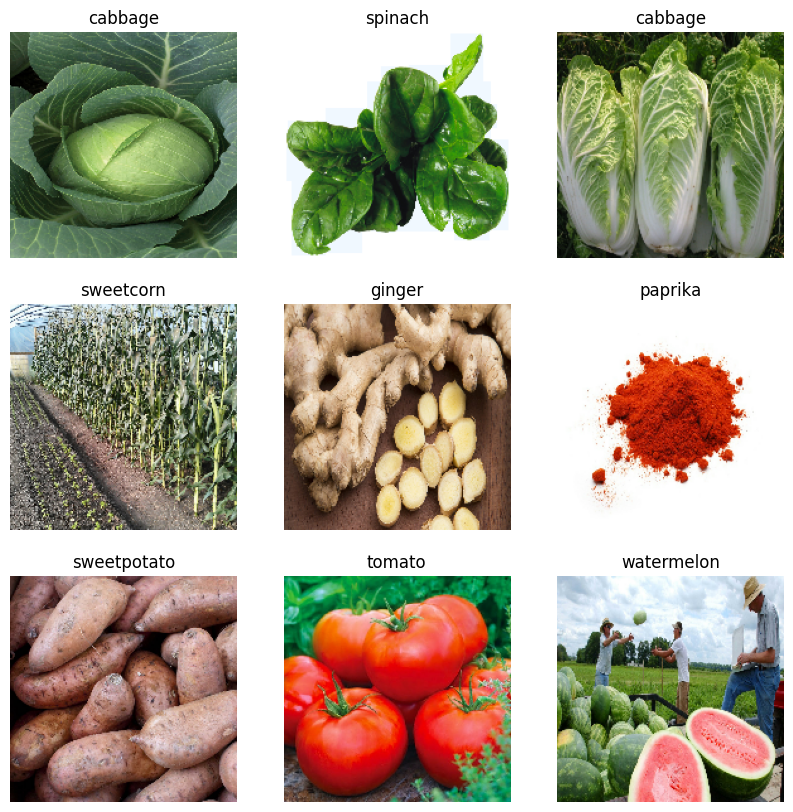

In [18]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [19]:
from tensorflow.keras.models import Sequential

In [ ]:
data_train

In [21]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [22]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Text(0.5, 1.0, 'Loss')

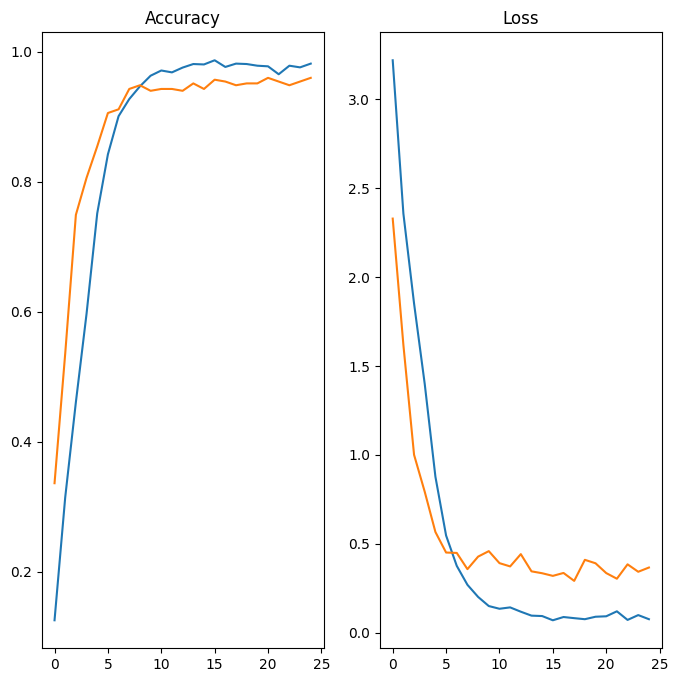

In [24]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [25]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [26]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


In [27]:
score = tf.nn.softmax(predict)

In [28]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is sweetcorn with accuracy of 74.72


In [29]:
model.save('Image_classify.keras')

In [ ]:
import os

model_path = r"C:\Python\Image_Classification\Image_classify.keras"

if os.path.exists(model_path):
    print("File exists.")
else:
    print(" File NOT found. Check the path!")


In [ ]:
import glob

files = glob.glob(r"C:\**\Image_classify.keras", recursive=True)
print(files)  # This will list all matching file paths


In [ ]:
import tensorflow as tf

# Example model (replace with your own)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(100,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Save the model
model.save(r"C:\Python\Image_Classification\Image_classify.keras")
print(" Model saved successfully!")
